# Data visualization tutorial
In this tutorial, we will visualize a dataset using both the `matplotlib`
and the `seaborn` library.

---
## The dataset

In [1]:
import seaborn as sns

df = sns.load_dataset("tips")
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
## Matplotlib
This is the visualization library you will use when you want to quickly make a simple plot, or when you want very
fine-grained control over every aspect of the plot.

In [2]:
import matplotlib.pyplot as plt

In [3]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Basic API
The general workflow consists of:
- Using `plt.subplots()` to create a Figure and any number of Axes (graphs) you want
- Using the `ax.` plotting methods to generate the visualizations
- Using the `ax.` customization methods to fine-tune your plots
- Displaying or saving the plot

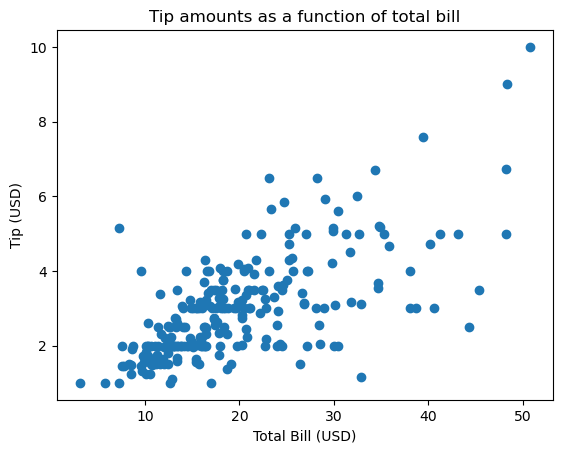

In [5]:
# Create the figure and get an Axes object with which to do your plotting
fig, ax = plt.subplots()

# Get numpy arrays for the data you want to plot
total_bill = df['total_bill'].values
tip = df['tip'].values

# Plot the data using one of Matplotlib's plotting functions
ax.scatter(total_bill, tip)

# Customize other aspects of the plot
ax.set_title('Tip amounts as a function of total bill')
ax.set_xlabel('Total Bill (USD)')
ax.set_ylabel('Tip (USD)')

# Display the plot
plt.show()

### Multiple plots on the same Axes object (graph)

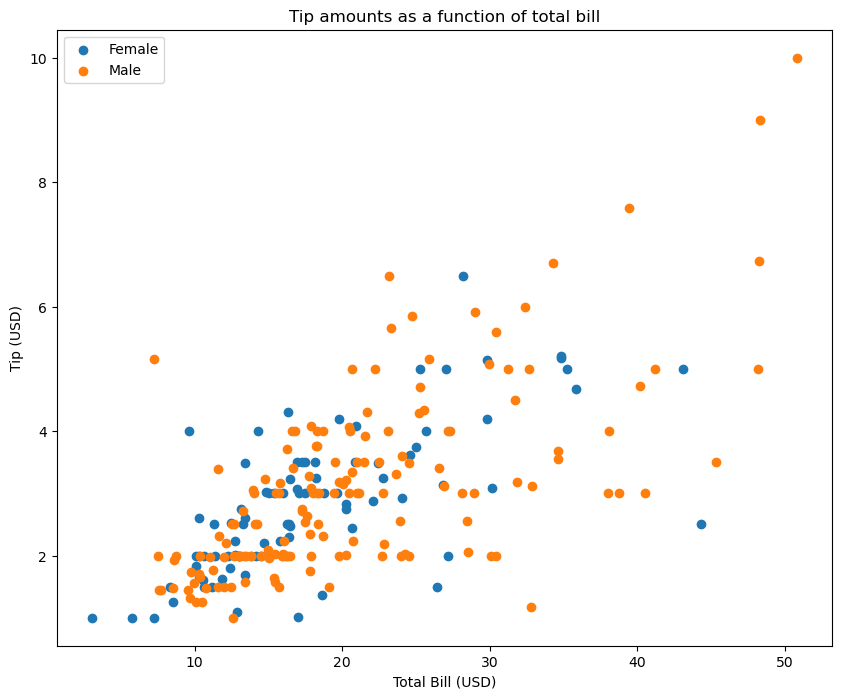

In [6]:
# Create the figure and get an Axes object with which to do your plotting
fig, ax = plt.subplots(figsize=(10, 8))    # You can manually set the figure size

# Get numpy arrays for the data you want to plot
df_female = df[df['sex'] == 'Female']
df_male = df[df['sex'] == 'Male']
total_bill_female = df_female['total_bill'].values
tip_female = df_female['tip'].values
total_bill_male = df_male['total_bill'].values
tip_male = df_male['tip'].values

# To put multiple plots in the same graph, just call
# multiple plotting functions. You can also pass in
# a label which will be used if you display a legend
ax.scatter(total_bill_female, tip_female, label='Female')
ax.scatter(total_bill_male, tip_male, label='Male')

# Customize other aspects of the plot
ax.set_title('Tip amounts as a function of total bill')
ax.set_xlabel('Total Bill (USD)')
ax.set_ylabel('Tip (USD)')

# Display the legend
ax.legend()

# Display the plot
plt.show()

### Multiple plots on different Axes objects (graph)

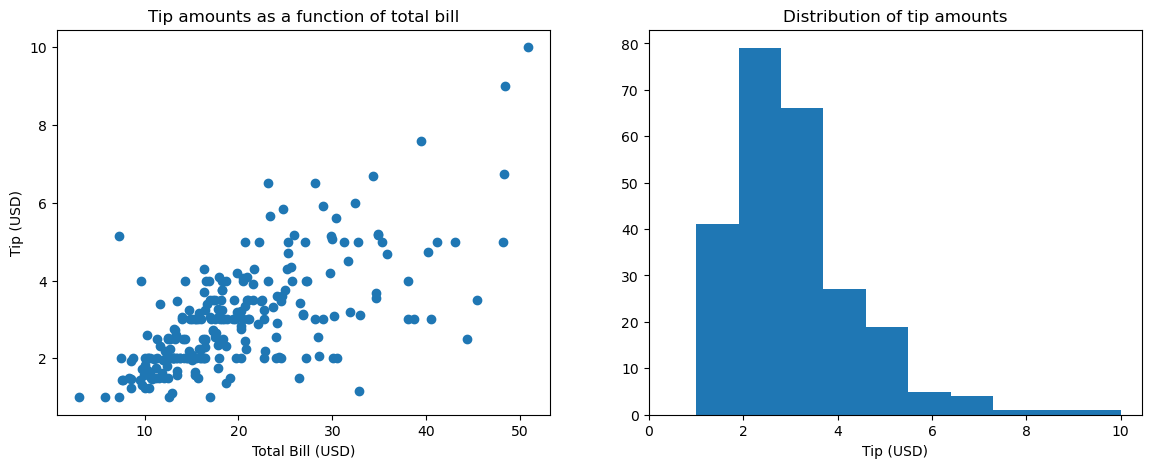

In [8]:
# Create 2 graphs, arranged in a 1row X 2column. "axes" will be an array of Axes objects.
# Note: if our grid were 2D (i.e. more than 1 row and column), then "axes" would be a 2d array of Axes objects.
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Make a scatterplot on the first graph
axes[0].scatter(total_bill, tip)

# Customize the first graph
axes[0].set_title('Tip amounts as a function of total bill')
axes[0].set_xlabel('Total Bill (USD)')
axes[0].set_ylabel('Tip (USD)')

# Make a histogram on the second graph
axes[1].hist(tip)

# Customize the second graph
axes[1].set_title('Distribution of tip amounts')
axes[1].set_xlabel('Tip (USD)')
axes[1].set_xlim(left=0)

# Display the plot
plt.show()

---
## Seaborn
This is likely the visualization library that you will use the most when trying
to present your data at a more professional level, or when attempting to visualize
more complex relationships easily. The advantages over Matplotlib are:
- It is designed to work well with Pandas, and this will be the format of most of your datasets.
- It handles a lot of the plotting logic for you. Fewer lines of code than using Matplotlib alone.
- It supports many kinds of plots natively and has a simple API to customize them.
- When necessary, you can still use Matplotlib to fine-tune your figures on top of Seaborn ones, since Seaborn is just using Matplotlib under the hood.

For a quick introduction to many different seaborn plots using simple
examples, visit this [tutorial](https://seaborn.pydata.org/introduction.html)
on their website.

In [9]:
# There are multiple themes that will apply to your whole plots 
# https://www.codecademy.com/articles/seaborn-design-i#:~:text=Seaborn%20has%20five%20built%2Din,better%20suit%20your%20presentation%20needs.
sns.set_style("darkgrid")

In [10]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Basic API
Most Seaborn plotting functions take in:
- A `data` argument, which is your Pandas dataframe
- One or more column names from your dataframe which dictate which parts are used for plotting

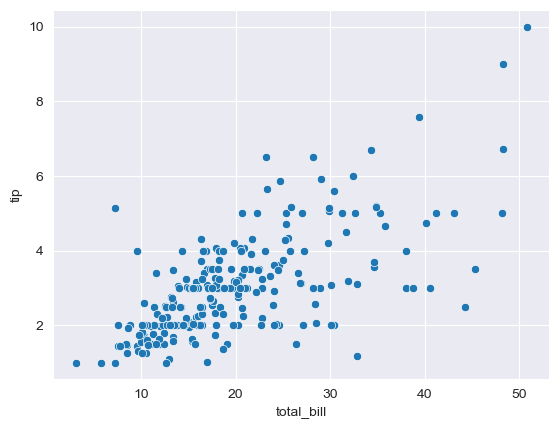

In [11]:
sns.scatterplot(x='total_bill', y='tip', data=df)

plt.show()

### Multiple plots in one figure
Most of the time, plotting functions take in an optional `hue` parameter
which corresponds to a column name that will be used to split the data.
The colours and legend will be created automatically.
There are often many other parameters too, depending on the plot type,
for which you can simply pass in column names that will dictate plot attributes.
This flexibility to work with a single dataframe and use various columns
to customize different properties of the resulting graph is one of the
things that makes Seaborn so powerful and easy to use.

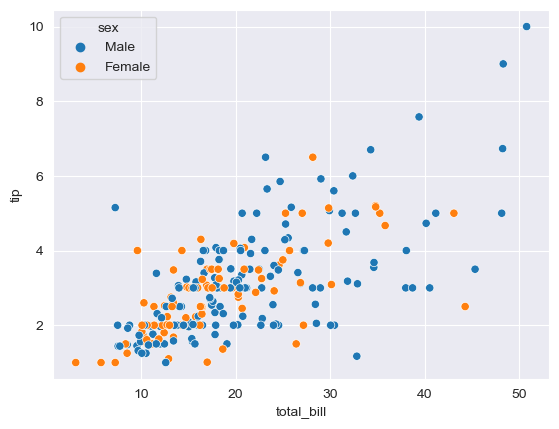

In [12]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)

plt.show()

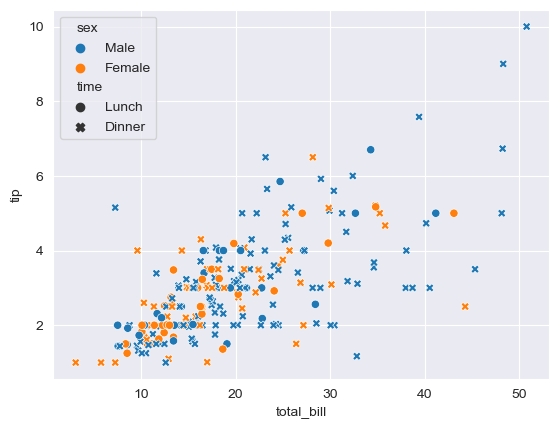

In [13]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='time', data=df)

plt.show()

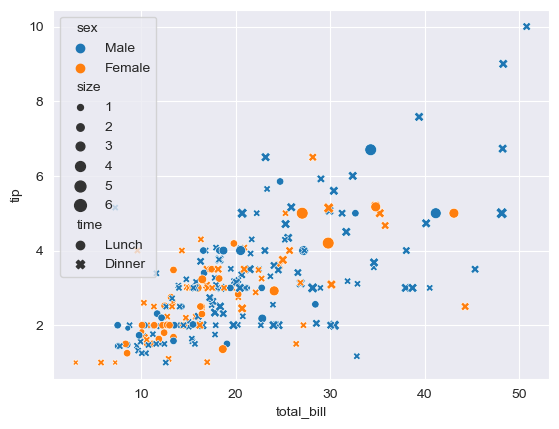

In [15]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='time', size='size', data=df)

plt.show()

### There are many more complex plot types

Some plot types will even automatically compute things for you and display them
(such as error bars).

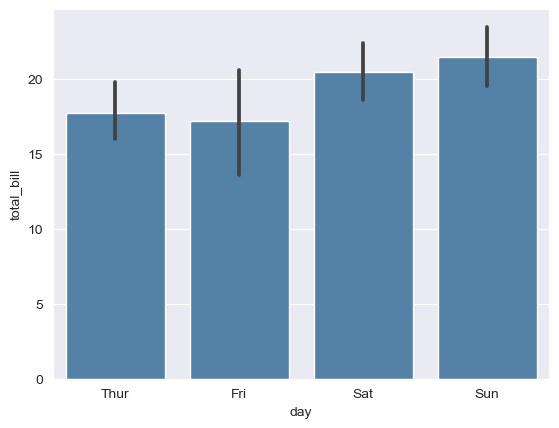

In [16]:
sns.barplot(x='day', y='total_bill', color='steelblue', data=df)

plt.show()

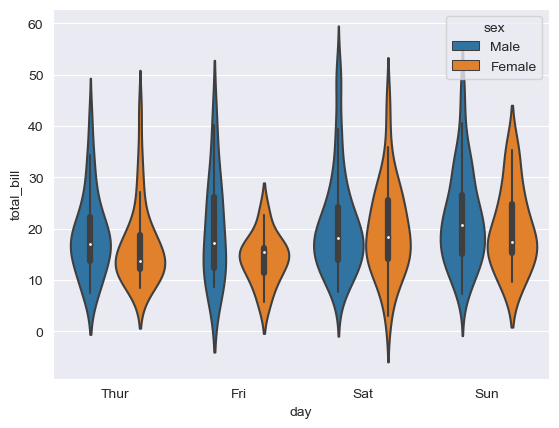

In [17]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=df)

plt.show()

### Integration with Matplotlib
Seaborn plots can be customized further using Matplotlib. Any seaborn plotting function:
- Returns a Matplotlib "Axes" object, which you can use just like any ordinary Matplotlib object.
- Can optionally take a Matplotlib "Axes" object as input, if you want to apply a Seaborn plot to an existing figure.

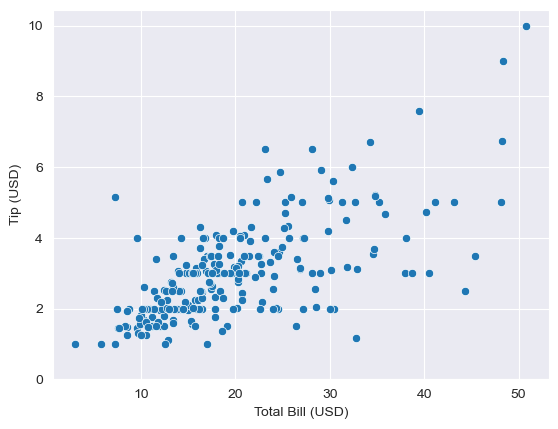

In [18]:
ax = sns.scatterplot(x='total_bill', y='tip', data=df)

# Change the default axis labels
ax.set_xlabel('Total Bill (USD)')
ax.set_ylabel('Tip (USD)')

# Manually set the range of an axis
ax.set_ylim(bottom=0)

plt.show()

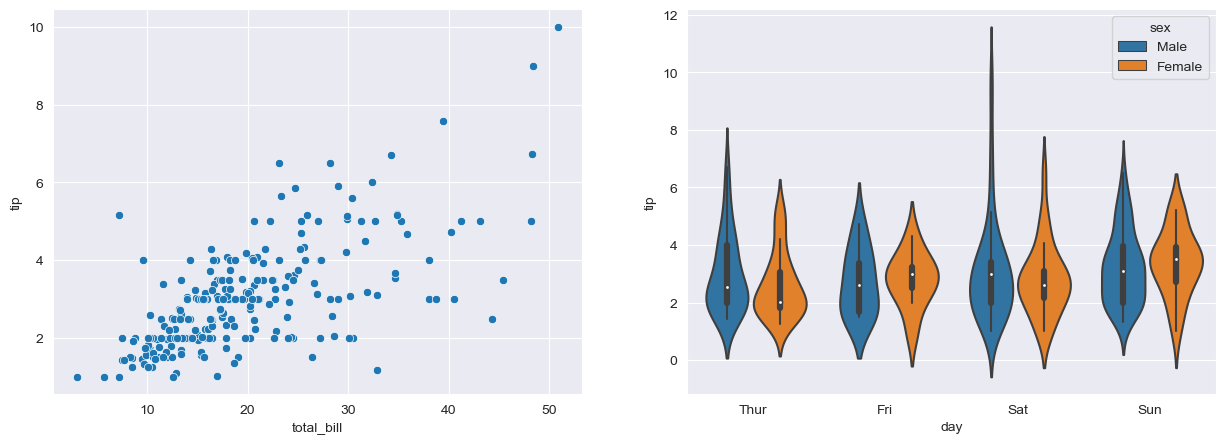

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x='total_bill', y='tip', data=df, ax=axes[0])
sns.violinplot(x='day', y='tip', hue='sex', data=df, ax=axes[1])

plt.show()

---
## Activity with Seaborn
- Take a look at the plotting gallery [here](https://seaborn.pydata.org/examples/index.html)
- Find a plot type that interests you and go look at its documentation
- Looking at the examples in the function's documentation:
    - Print out a few rows from the dataframe
    - Try out the plotting function
- Post your code in the slack thread so that I can execute it in my notebook
- Explain the plot you made to the rest of us (**1 min**)